# CIS 545 Final Projects

Authors: David Feng, Ben Demers \\
We intend to build a model to determine the danceability of a song. The current dataset assigns a danceability between 0 and 1, and we intend to classify songs by breaking the danceability into 5 classification ranges.
The ultimate objective is to use the given features (genre, tempo, liveliness, etc.) to predict the danceability of a given song. 
We will try multiple multiclass classification algorithms such as Gradient Boosting, RandomForest, Logistic Regression, and Support Vector Machine models. We could compare the results of our model with unsupervised k-means clustering of the dataset based on danceability.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score

In [3]:
plt.rcParams['figure.figsize'] = (15, 10)

## Step 1: EDA
Explore the dataset and find which feautres will be most useful in predicting dancability

Download dataset from Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/CIS 545/Final Project/SpotifyFeatures.csv')
print(f'There are {dataset.loc[dataset.isna().any(axis=1)].shape[0]} rows with nulls')

There are 0 rows with nulls


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [7]:
dataset.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Let's also check to see which songs seem to be more danceable - maybe at first glace we'll see some patterns! If not we can look at the heat map to look for feature correlation. It seems as if certain genres seem to be more danceable, such as children's music, hip-hop, electronic, etc.

In [8]:
dataset.sort_values(by="danceability", ascending=False).head(30)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
75396,Children's Music,Juice Music,Fuzzy Wuzzy,2QyXjGX0rcQq7GVCpmLyyQ,1,0.108000,0.989,93307,0.4680,0.000000,G,0.3000,-10.298,Major,0.0717,115.002,4/4,0.977
75762,Children's Music,Juice Music,I've Been Everywhere,1RTrI6ixzz2OFdZunqwR5M,1,0.587000,0.987,155000,0.7390,0.000000,G,0.0738,-9.435,Major,0.0578,119.992,4/4,0.963
26911,Electronic,Quantic,Sol Clap,5a4BSdNOUDHzGwEWCJ6ym5,33,0.001670,0.987,230747,0.6290,0.163000,C,0.0634,-7.136,Major,0.2650,115.342,4/4,0.424
178675,Jazz,Quantic,Sol Clap,5a4BSdNOUDHzGwEWCJ6ym5,33,0.001670,0.987,230747,0.6290,0.163000,C,0.0634,-7.136,Major,0.2650,115.342,4/4,0.424
90205,Hip-Hop,Pitbull,Go Girl,1MgM0WDaoQ2A3bnIQTR6ty,50,0.145000,0.986,229669,0.5970,0.000002,G#,0.1970,-6.809,Major,0.3080,115.004,4/4,0.761
23822,Electronic,Nu,Who Loves the Sun,0GCLyiQXeI7zXDKQ4jY1mB,58,0.189000,0.985,562239,0.6860,0.669000,A#,0.1930,-9.905,Minor,0.0510,120.004,4/4,0.693
92402,Hip-Hop,Wifisfuneral,LoyaltyRunsDeepInDaLongRun,6Y80EzVMJjFp9Yxy50SN7D,47,0.067200,0.982,89234,0.5190,0.000000,G,0.1160,-10.797,Major,0.1980,119.993,4/4,0.461
75477,Children's Music,Juice Music,Baby Elephant Walk,4dFuiA1lN44pE7OH6X0Lbw,0,0.049600,0.981,129200,0.4580,0.000034,F,0.0700,-12.208,Major,0.0403,124.997,4/4,0.908
75388,Children's Music,Juice Music,Spaghetti Bolognaise,1MmsR3Nb7abGObdvfSZkvx,2,0.211000,0.981,137000,0.3450,0.000000,E,0.0666,-11.239,Major,0.0770,125.031,4/4,0.926
88118,Hip-Hop,Rae Sremmurd,Chanel (feat. Swae Lee & Pharrell) - From Jxmtro,2W6JHG3KGGPv82Bi2hAnSz,56,0.005500,0.980,264001,0.7130,0.000000,F,0.1060,-4.980,Major,0.0468,125.030,4/4,0.670


I'm (David) is also a big Taylor Swift fan, so I'm just curious to see how danceable her songs are! Here, we also notice that some songs are in the dataset twice because they are in multiple genres

In [9]:
dataset[dataset['artist_name'] == 'Taylor Swift'].sort_values(by="danceability", ascending=False).head(20)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
151823,Pop,Taylor Swift,Hey Stephen,4WXzzCof26KJLTK5kK53dS,53,0.19400,0.841,254307,0.544,0.000002,F#,0.1080,-7.347,Major,0.0309,115.994,4/4,0.8310
16332,Dance,Taylor Swift,Hey Stephen,4WXzzCof26KJLTK5kK53dS,53,0.19400,0.841,254307,0.544,0.000002,F#,0.1080,-7.347,Major,0.0309,115.994,4/4,0.8310
18968,Dance,Taylor Swift,Treacherous - Original Demo Recording,7BT9K9BDqq6HI2oWH5UMZQ,47,0.18000,0.822,239720,0.618,0.000188,D,0.1230,-8.166,Major,0.0349,109.980,4/4,0.5750
16246,Dance,Taylor Swift,Clean,06WgOCf0LV2h4keYXDRnuh,53,0.24200,0.810,271000,0.380,0.000000,E,0.1130,-7.755,Major,0.0350,103.981,4/4,0.2110
151564,Pop,Taylor Swift,Clean,06WgOCf0LV2h4keYXDRnuh,54,0.24200,0.810,271000,0.380,0.000000,E,0.1130,-7.755,Major,0.0350,103.981,4/4,0.2110
109148,Pop,Taylor Swift,Gorgeous,1ZY1PqizIl78geGM4xWlEA,72,0.07130,0.800,209680,0.535,0.000009,G,0.2130,-6.684,Major,0.1350,92.027,4/4,0.4510
13909,Dance,Taylor Swift,Gorgeous,1ZY1PqizIl78geGM4xWlEA,72,0.07130,0.800,209680,0.535,0.000009,G,0.2130,-6.684,Major,0.1350,92.027,4/4,0.4510
111457,Pop,Taylor Swift,Welcome To New York,6qnM0XXPZOINWA778uNqQ9,60,0.03800,0.793,212600,0.634,0.000002,G,0.3040,-4.807,Major,0.0324,117.023,4/4,0.6150
14740,Dance,Taylor Swift,Welcome To New York,6qnM0XXPZOINWA778uNqQ9,60,0.03800,0.793,212600,0.634,0.000002,G,0.3040,-4.807,Major,0.0324,117.023,4/4,0.6150
108696,Pop,Taylor Swift,Look What You Made Me Do,1JbR9RDP3ogVNEWFgNXAjh,77,0.20400,0.766,211853,0.709,0.000014,A,0.1260,-6.471,Minor,0.1230,128.070,4/4,0.5060


The genres that are in the dataset. There seems to be two Children's Music genres.

In [10]:
dataset.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [11]:
dataset = dataset.replace(to_replace = "Children's Music", value = "Children’s Music")
dataset.genre.unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       'Children’s Music', 'Rap', 'Indie', 'Classical', 'Pop', 'Reggae',
       'Reggaeton', 'Jazz', 'Rock', 'Ska', 'Comedy', 'Soul', 'Soundtrack',
       'World'], dtype=object)

Plot number of songs by genre

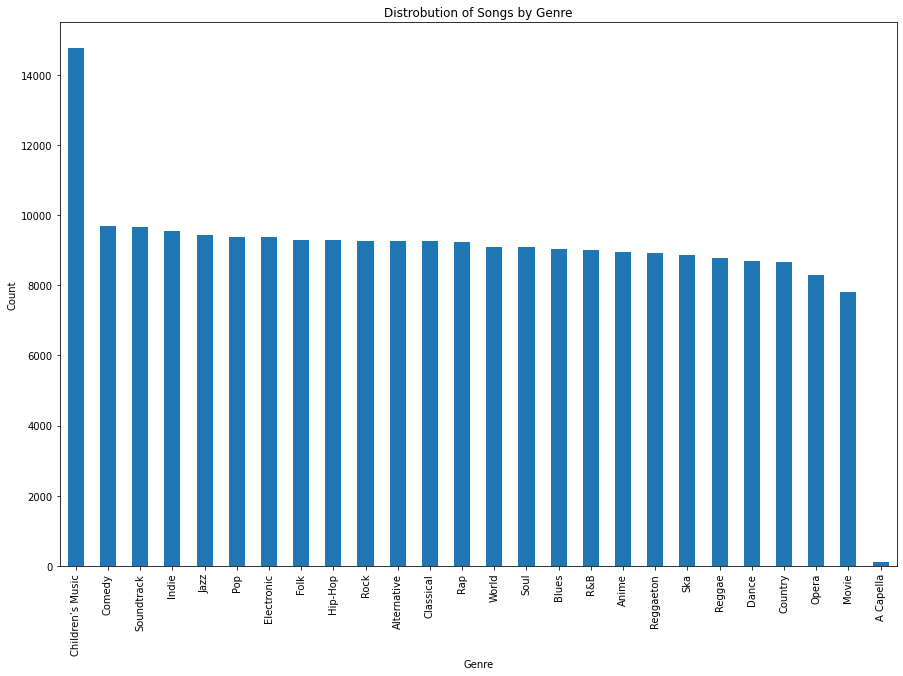

In [13]:
dataset.genre.value_counts().plot(kind='bar')
plt.title('Distrobution of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Explore what the comedy genre looks like and if it makes sense to include for predicting danceablity.

In [14]:
dataset.loc[dataset['genre'] == 'Comedy'].describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,9681.000000,9681.000000,9681.000000,9.681000e+03,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000,9681.000000
mean,21.342630,0.793098,0.559038,2.353052e+05,0.676094,0.000574,0.724775,-11.689321,0.853532,98.235488,0.412764
std,8.428764,0.130313,0.089625,2.502539e+05,0.211705,0.009987,0.223437,4.777983,0.205918,27.839986,0.207258
min,0.000000,0.000363,0.239000,3.004000e+04,0.001410,0.000000,0.025800,-31.047000,0.023000,32.451000,0.023700
25%,15.000000,0.753000,0.499000,1.218800e+05,0.522000,0.000000,0.662000,-14.649000,0.888000,79.720000,0.252000
50%,20.000000,0.819000,0.561000,1.890570e+05,0.704000,0.000000,0.767000,-11.209000,0.928000,90.124000,0.410000
75%,26.000000,0.872000,0.620000,2.812930e+05,0.859000,0.000000,0.898000,-8.088000,0.944000,115.128000,0.561000
max,61.000000,0.995000,0.898000,5.552917e+06,0.998000,0.352000,0.996000,-0.255000,0.967000,207.157000,0.980000


Seems like it would make sense to include because there is a reasonable range of danceability in the genre

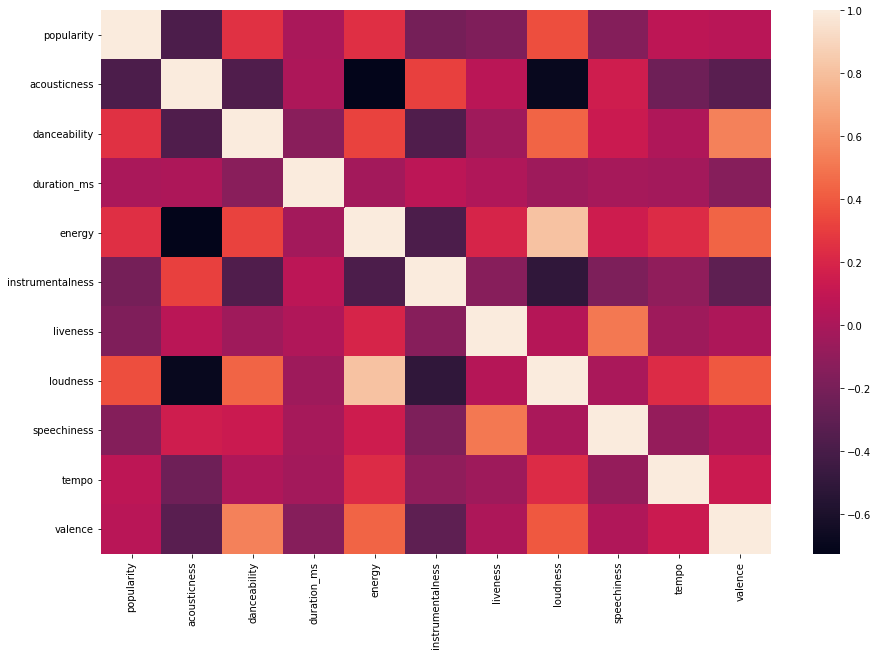

In [15]:
corr = dataset.corr()
sb.heatmap(corr)

In [16]:
corr

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


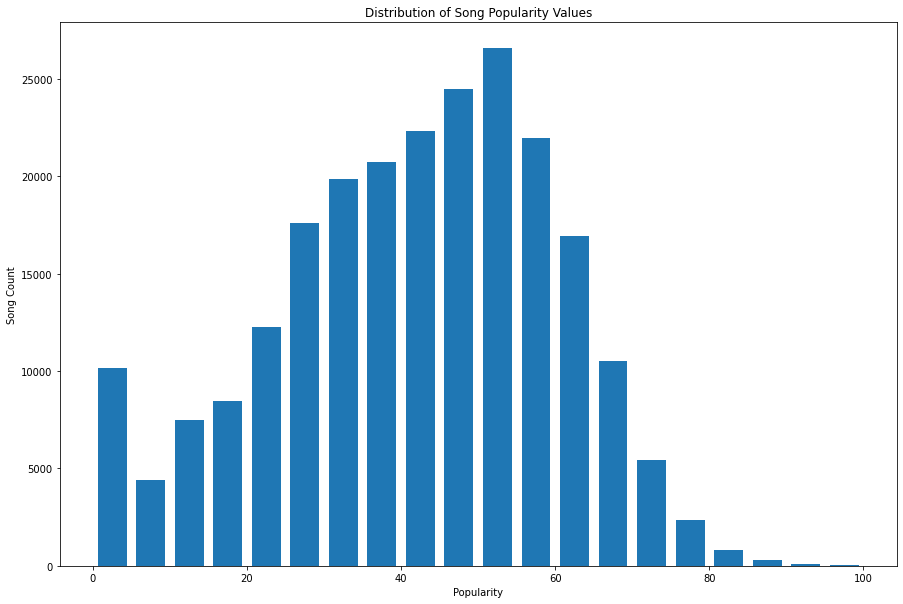

In [17]:
n, bins, patches = plt.hist(dataset["popularity"], bins = 20, rwidth=.75)
plt.xlabel('Popularity')
plt.ylabel('Song Count')
plt.title('Distribution of Song Popularity Values')
plt.show()

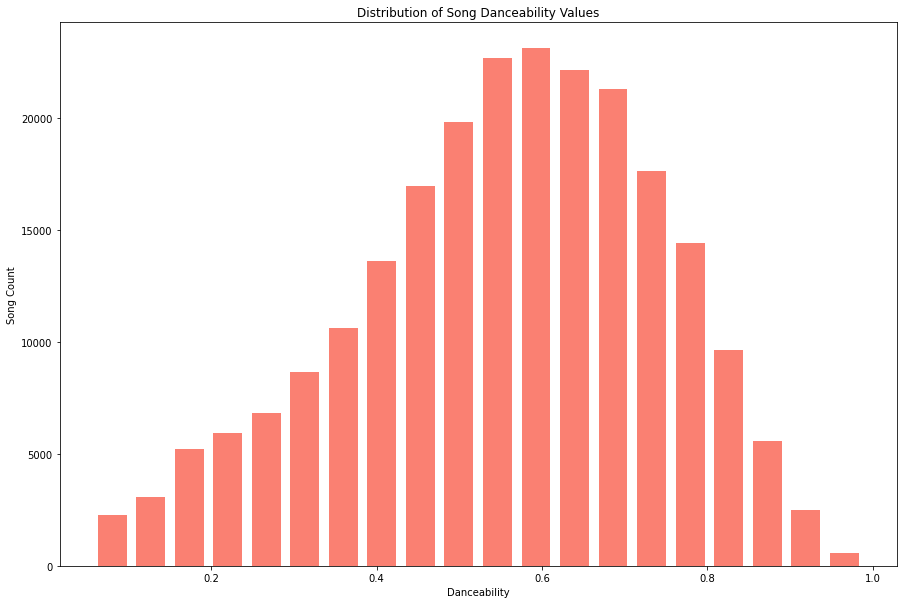

In [18]:
n, bins, patches = plt.hist(dataset["danceability"], bins = 20, rwidth=.75, color='salmon')
plt.xlabel('Danceability')
plt.ylabel('Song Count')
plt.title('Distribution of Song Danceability Values')
plt.show()

In [ ]:
dataset['popularity'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

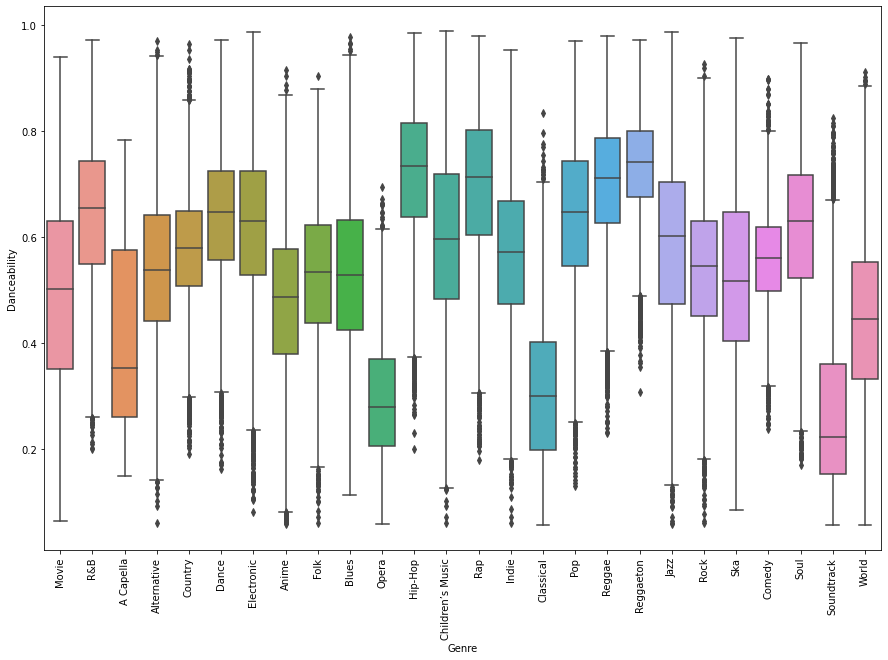

In [19]:
plt.rcParams['figure.figsize'] = (15, 10)
sb.boxplot(x = dataset['genre'],  y=dataset['danceability'])
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.xticks(rotation='vertical')
plt.show()

Looks like energy, loudness, and valence are key contributing factors to danceability.

## Step 2: Preprocessing
Getting the data in the right format to be inputted into the model.

TO DO
*   Encode categorical features
*   Clean data
*   Encode labels into 5 classes
*   Dimentionality rediction, PCA?

Let's first ensure the two Children's Music categories are combined.

We are now going to split the data up by quantile - these will be the labels we use for training. The highest scores (20th percentile) will be labeled as 1, and the lowest scores will be labeled as 5.

In [20]:
first, second, third, fourth = dataset.danceability.quantile(0.2), dataset.danceability.quantile(0.4), dataset.danceability.quantile(0.6), dataset.danceability.quantile(0.8)
print(first, second, third, fourth)

0.39799999999999996 0.523 0.618 0.718


In [21]:
def getLabel(x):
  if (x >= fourth):
    return 1
  if (x < fourth) & (x >= third):
    return 2
  if (x < third) & (x >= second):
    return 3
  if (x < second) & (x >= first):
    return 4
  return 5

dataset['label'] = dataset['danceability'].apply(lambda x: getLabel(x))
dataset

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,5
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,3
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,5
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,2
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,1
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,4
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,1


Now, we must encode our categorical variables such as genre, artist, key, mode, and time signature.

In [22]:
print("There are", dataset['genre'].unique().size, "genres in the dataset")
print("There are", dataset['artist_name'].unique().size, "artists in the dataset")
print("There are", dataset['key'].unique().size, "keys in the dataset")
print("There are", dataset['mode'].unique().size, "modes in the dataset")
print("There are", dataset['time_signature'].unique().size, "time signatures in the dataset")

There are 26 genres in the dataset
There are 14564 artists in the dataset
There are 12 keys in the dataset
There are 2 modes in the dataset
There are 5 time signatures in the dataset


Given the sheer number of artists, it would not make sense to encode that category as a one-hot variable. We will, however, make one-hot encodings of the other categorical variables. Also, we found out during EDA that there are some tracks that appear multiple times due to having multiple genres. Here, we can merge datapoints with the same track_id.

In [23]:
one_hot = pd.get_dummies(dataset['genre'])
dataset = dataset.join(one_hot)

one_hot = pd.get_dummies(dataset['key'])
dataset = dataset.join(one_hot)

one_hot = pd.get_dummies(dataset['mode'])
dataset = dataset.join(one_hot)

one_hot = pd.get_dummies(dataset['time_signature'])
dataset = dataset.join(one_hot)

dataset = dataset.groupby("track_id").agg('max')
dataset[dataset['artist_name'] == 'Taylor Swift'].sort_values(by='track_id')

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label,A Capella,Alternative,Anime,Blues,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,A,A#,B,C,C#,D,D#,E,F,F#,G,G#,Major,Minor,0/4,1/4,3/4,4/4,5/4
track_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
06WgOCf0LV2h4keYXDRnuh,Pop,Taylor Swift,Clean,54,0.24200,0.810,271000,0.380,0.000000,E,0.1130,-7.755,Major,0.0350,103.981,4/4,0.211,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
07NxDD1iKCHbAldceD7QLP,Pop,Taylor Swift,This Is Why We Can’t Have Nice Things,68,0.01560,0.567,207133,0.789,0.000000,F,0.3820,-5.986,Major,0.1150,163.960,4/4,0.438,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
08gavXombT6KR0af88i9tA,Dance,Taylor Swift,Jump Then Fall,48,0.11500,0.618,237067,0.674,0.000000,D,0.0832,-5.675,Major,0.0276,79.985,4/4,0.800,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
0HmCuN0Z3OX1Qrz43FLOPL,Dance,Taylor Swift,You're Not Sorry,52,0.14600,0.475,261787,0.452,0.000001,F#,0.1080,-4.134,Major,0.0270,133.959,4/4,0.276,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
0JIdBrXGSJXS72zjF9ss9u,Dance,Taylor Swift,I'm Only Me When I'm With You,50,0.00543,0.544,213053,0.912,0.000715,G#,0.0976,-3.612,Major,0.0738,143.983,4/4,0.629,3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7I7JbDv63ZJJsSi24DyJrz,Pop,Taylor Swift,Dancing With Our Hands Tied,68,0.06040,0.624,211507,0.691,0.000011,C,0.1380,-6.686,Minor,0.1960,160.024,4/4,0.284,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7an1exwMnfYRcdVQm0yDev,Dance,Taylor Swift,Cold As You,48,0.27200,0.414,239013,0.489,0.000000,F,0.1120,-5.651,Major,0.0251,175.662,4/4,0.350,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
7vvIpJZye5cRR6De1LKM0m,Pop,Taylor Swift,The Last Time,54,0.03680,0.500,298293,0.458,0.000006,D,0.0897,-7.033,Major,0.0269,93.987,4/4,0.132,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


After checking Taylor Swift's data, it seems as if the one-hot encodings combined quite well. Therefore, we can drop the columsn that are not needed.

In [24]:
dataset = dataset.reset_index().drop(['time_signature', 'key', 'genre', 'mode', 'artist_name', 'track_name', 'track_id'], axis=1)

In [25]:
dataset

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,label,A Capella,Alternative,Anime,Blues,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,A,A#,B,C,C#,D,D#,E,F,F#,G,G#,Major,Minor,0/4,1/4,3/4,4/4,5/4
0,13,0.2340,0.617,169173,0.862,0.976000,0.1410,-12.855,0.0514,129.578,0.886,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,5,0.2490,0.518,130653,0.805,0.000000,0.3330,-6.248,0.0407,79.124,0.841,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,30,0.3660,0.631,357573,0.513,0.000004,0.1090,-6.376,0.0293,120.365,0.307,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,39,0.8150,0.768,104924,0.137,0.922000,0.1130,-13.284,0.0747,76.430,0.560,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,70,0.1310,0.748,188491,0.627,0.000000,0.0852,-6.029,0.0644,120.963,0.524,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,38,0.4000,0.851,251267,0.790,0.230000,0.1230,-4.641,0.0309,111.993,0.889,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
176770,40,0.9730,0.538,266933,0.144,0.177000,0.3590,-17.711,0.0569,135.640,0.110,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
176771,28,0.1130,0.716,228493,0.806,0.000000,0.1510,-5.913,0.1350,136.069,0.544,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
176772,67,0.2170,0.664,267960,0.537,0.000003,0.1180,-6.000,0.0290,115.049,0.221,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


We have already checked to ensure that there are no null or NaN values in each of the encoded columns; therefore, the data is cleaned and ready to be split into test and training data!

In [26]:
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)

## Step 3: Modeling
Train and test various models on the dataset

Models to test
*   Linear Regression
*   Gradient boosting
*   Random Forest

Steps:

1.   Set up k-fold validation
2.   Tune hyperparamters
3.   Use best params to make final model and predict on the test set







Here, we split thre training and test data into the features and the labels so that they can be more easily fed into our models.

In [27]:
x_train, x_test = train_data.loc[:, train_data.columns != 'label'], test_data.loc[:, test_data.columns != 'label'] 
y_train , y_test = train_data['label'], test_data['label']

Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

XGBoost

In [46]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 200)
xg_reg.fit(x_train, y_train)
xg_pred = xg_reg.predict(x_test)

Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

0.9567933244011058

## Step 4: Evaulation
Compare the results and preformance of each model 

Metrics:
* Train Accuracy
* Test Accuracy
* Root Mean Square Error

Results of Logistic Regression

In [36]:
lr_train_acc = lr.score(x_train, y_train)
lr_test_acc = lr.score(x_test, y_test)
print(f'Training accuracy of linear regression: {lr_train_acc}, testing accuracy of linear regression: {lr_test_acc}')

Training accuracy of linear regression: 0.9107882852250764, testing accuracy of linear regression: 0.9110022203229767


In [37]:
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_pred))
rmse_lr

0.42729360591362003

Results of Gradient Boosting

In [44]:
xg_train_pred = xg_reg.predict(x_train)
xgb_train_result = pd.DataFrame()
xgb_train_result['Prediction'] = np.round(xg_train_pred) 
xgb_train_result['Actual'] = y_train.to_numpy()
xgb_train_result['Correct'] = xgb_train_result['Prediction'] == xgb_train_result['Actual']
xgb_train_result['Correct'].value_counts(normalize=True)

True     0.999993
False    0.000007
Name: Correct, dtype: float64

In [42]:
xgb_test_result = pd.DataFrame()
xgb_test_result['Prediction'] = np.round(xg_pred) 
xgb_test_result['Actual'] = y_test.to_numpy()
xgb_test_result['Correct'] = xgb_test_result['Prediction'] == xgb_test_result['Actual']
xgb_test_result['Correct'].value_counts(normalize=True)

True     0.998925
False    0.001075
Name: Correct, dtype: float64

In [39]:
xgb_rmse = np.sqrt(mean_squared_error(y_test, xg_pred))
xgb_rmse

0.1128023969170655

Results of Random Forest

In [47]:
rfr_train_acc = rfr.score(x_train, y_train)
rfr_test_acc = rfr.score(x_test, y_test)
print(f'Training accuracy of linear regression: {rfr_train_acc}, testing accuracy of linear regression: {rfr_test_acc}')

Training accuracy of linear regression: 0.9564015109095917, testing accuracy of linear regression: 0.9567933244011058


In [34]:
rmse_rfr = np.sqrt(mean_squared_error(y_test, rfr_pred))
rmse_rfr

0.29772289553894016